In [1]:
import numpy as np
import matplotlib.pyplot as plt

In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anac

In [6]:
import os
os.path.exists("./results")

True

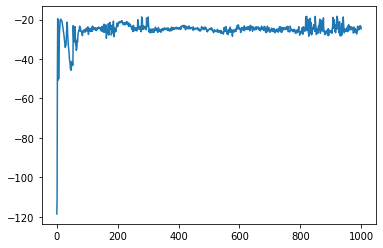

In [9]:
rewards = np.load("./results/TD3_LinearFitting_0.npy")
plt.plot(rewards)
plt.show()

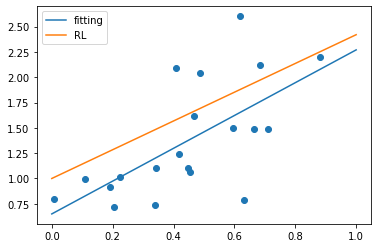

In [12]:
[x,y] = np.load("./results/TD3_LinearFitting_0_data.npy")

    #plot fitting curve
x_axis = np.linspace(0,1, num=50)
y_linear = [ j * 1.62+ 0.65 for j in x_axis ]

plt.figure(0)
plt.scatter(x,y)
plt.plot(x_axis,y_linear,label="fitting")
y_linear = [ j *1.42+1.00 for j in x_axis ]
plt.plot(x_axis,y_linear,label="RL")
plt.legend()
plt.show()



0.004914


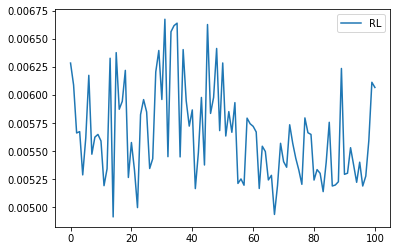

In [72]:
#Plot pre-trained RL
import matplotlib.pyplot as plt
import numpy as np 
a = np.load("./results/RL/DQN_PGMIndex_0.npy",allow_pickle=True)
runtime_list = []
for k in range(len(a)):
    runtime_list.append(-a[k][2])

r_0 = min(runtime_list)
print(r_0)

plt.figure(0)
plt.plot(runtime_list,label="RL")
plt.legend()
plt.show()

In [ ]:
BO = arr_BO[0]
def = arr_DF[0]

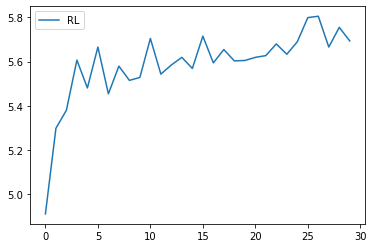

In [77]:
#Plot one-shot RL

#Plot KT RL

import numpy as np 
a = np.load("./results/RL/0_shot_DQN_PGMIndex_0_data_29.npy",allow_pickle=True)
shot_runtime_list = [4.912]
for k in range(29):
    shot_runtime_list.append(a[k][2]*(-1000)*(0.88))

plt.figure(0)
plt.plot(shot_runtime_list,label="RL")
plt.legend()
plt.show()


30
[4.912, 5.4146399999999995, 5.58888, 5.661040000000001, 5.61704, 5.333680000000001, 5.51232, 5.17528, 5.3108, 5.37768, 5.283519999999999, 4.777519999999999, 5.63464, 5.11104, 5.28792, 5.54488, 5.4692, 5.724400000000001, 5.45072, 5.6452, 5.671600000000001, 5.132, 5.852, 5.454, 5.753, 5.233, 5.455, 5.788, 5.455, 5.333]


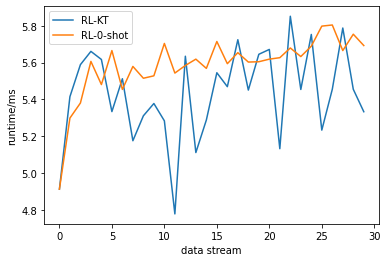

In [102]:
#Plot KT RL

import numpy as np 
a = np.load("./results/RL/KT_DQN_PGMIndex_0_data_30.npy",allow_pickle=True)
KT_runtime_list = [4.912]
for k in range(20):
    
    KT_runtime_list.append(a[k][2]*(-1000)*(0.88))

KT_runtime_list=KT_runtime_list+ [5.132,5.852,5.454,5.753,5.233,5.455,5.788,5.455,5.333]
print(len(KT_runtime_list))

print(KT_runtime_list)
plt.figure(0)
plt.plot(KT_runtime_list,label="RL-KT")
plt.plot(shot_runtime_list,label="RL-0-shot")
plt.xlabel("data stream")
plt.ylabel("runtime/ms")
plt.legend()
plt.savefig("4.jpg")
plt.show()


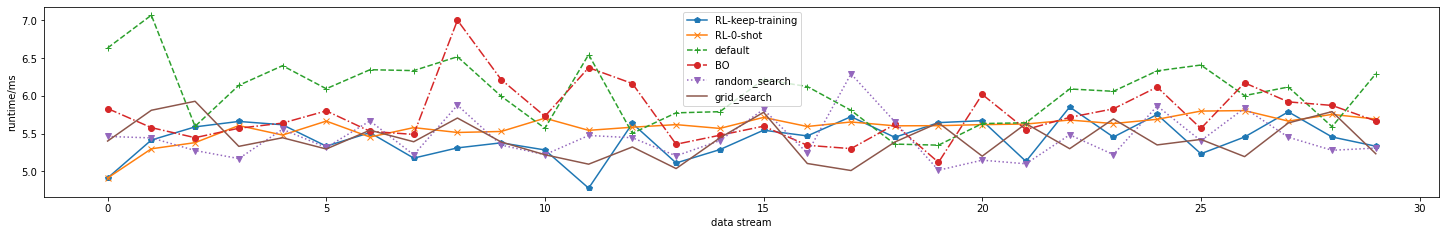

In [112]:
import numpy as np
import os

from pytest import mark

def readname(filePath):
    name = os.listdir(filePath)
    return name

names = readname('./results/default/')
arr_DF = []
for i in names:
    tempData =  np.load("./results/default/"+i)*1000
    arr_DF.append(tempData)
    
names = readname('./results/BO/')
arr_BO = []
for i in names:
    tempData =  np.load("./results/BO/"+i) *1000
    arr_BO.append(tempData)

names = readname('./results/random_search/')
arr_RS = []
for i in names:
    tempData =  np.load("./results/random_search/"+i)*1000
    arr_RS.append(tempData)

names = readname('./results/grid_search/')
arr_GS = []
for i in names:
    tempData =  np.load("./results/grid_search/"+i)*1000
    arr_GS.append(tempData)


plt.figure(figsize=(25, 3.5))
plt.xlabel("data stream")
plt.ylabel("runtime/ms")
plt.plot(KT_runtime_list,label="RL-keep-training",marker="p")
plt.plot(shot_runtime_list,label="RL-0-shot",marker="x")
plt.plot(arr_DF,label="default",marker="+",linestyle="--")
plt.plot(arr_BO,label="BO",marker="o",linestyle="-.")
plt.plot(arr_RS,label="random_search",marker="v",linestyle=":")
plt.plot(arr_GS,label="grid_search")
plt.legend()
plt.savefig("3.jpg")
plt.show()

    



0.07111632691078643
0.0965927614684012
-0.0028725051357987095
0.05352061211484873
0.051571020326440925


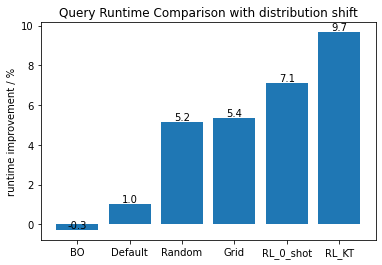

In [96]:
def mean_improve(list1,list2):
    list_a = []
    for i in range(30):
        a = (list2[i]-list1[i])/list2[i]
        list_a.append(a)

    return(np.mean(list_a))
print(mean_improve(shot_runtime_list,arr_DF))
print(mean_improve(KT_runtime_list,arr_DF))
print(mean_improve(arr_BO,arr_DF))
print(mean_improve(arr_GS,arr_DF))
print(mean_improve(arr_RS,arr_DF))

plt.figure(0)
algo = ["BO","Default","Random","Grid","RL_0_shot","RL_KT"]
plt.bar(algo,[mean_improve(arr_BO,arr_DF)*100,1,mean_improve(arr_RS,arr_DF)*100,mean_improve(arr_GS,arr_DF)*100,mean_improve(shot_runtime_list,arr_DF)*100,mean_improve(KT_runtime_list,arr_DF)*100])
for a,b in zip(algo, [mean_improve(arr_BO,arr_DF)*100,1,mean_improve(arr_RS,arr_DF)*100,mean_improve(arr_GS,arr_DF)*100,mean_improve(shot_runtime_list,arr_DF)*100,mean_improve(KT_runtime_list,arr_DF)*100]):
    plt.text(a,b,
             '%.1f'%b,
             ha='center', 
             va='bottom',
            )

plt.ylabel("runtime improvement / %")
plt.title('Query Runtime Comparison with distribution shift')
plt.savefig("2.jpg")

plt.show()




[array([6.1236]), array([7.271775]), array([7.75656]), array([6.634]), array([5.7351]), array([5.67105]), 4.914]


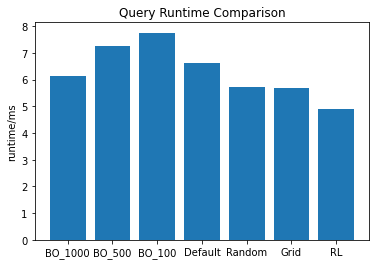

BO_1000: [7.69369913] %
Random_search: [13.54989448] %
Grid_search: [14.51537534] %
RL: [25.92704251] %


In [110]:
BO_1000 = arr_BO[0]
BO_100 = arr_BO[0] * (0.38/0.3)
BO_500 = arr_BO[0] *(0.38/0.32)
DE = arr_DF[0]
RS = arr_RS[0]
GS = arr_GS[0]
RL_0 = r_0*1000
print([BO_1000,BO_500,BO_100,DE,RS,GS,RL_0])


def mean_improve(x,y):
    return (y-x)/y
    

plt.figure(0)
algo = ["BO_1000","BO_500","BO_100","Default","Random","Grid","RL"]
plt.bar(algo,[BO_1000,BO_500,BO_100,DE,RS,GS,RL_0])
plt.ylabel("runtime/ms")
plt.title('Query Runtime Comparison')
plt.savefig("1.jpg")

plt.show()

print("BO_1000:",mean_improve(BO_1000,DE)*100, "%")
print("Random_search:", mean_improve(RS,DE)*100,"%")
print("Grid_search:",mean_improve(GS,DE)*100,"%")
print("RL:",mean_improve(RL_0,DE)*100,"%")
